In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('adult.data')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
print(df.columns)

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')


Let's change the columns name


In [4]:
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


# ***EDA Befor preprocessing***

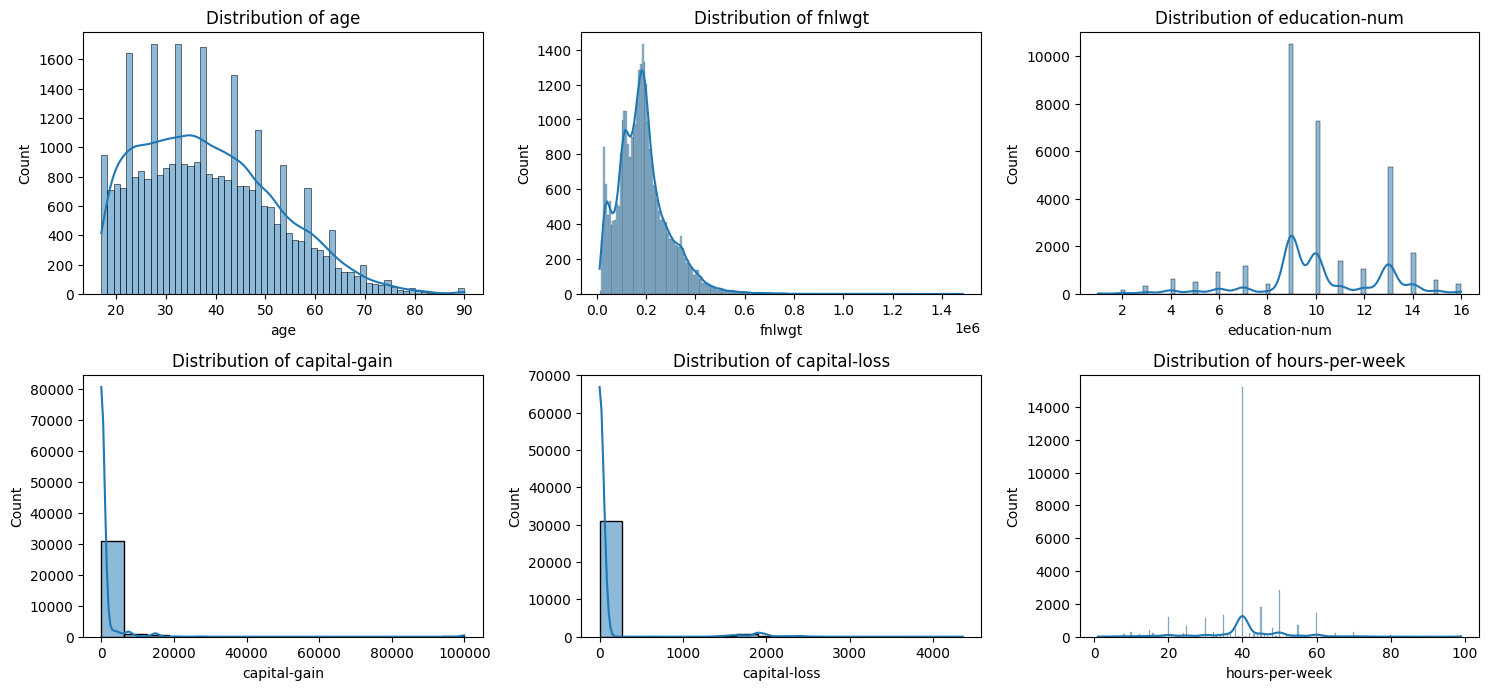

In [5]:

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Adjust subplot grid size as needed
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

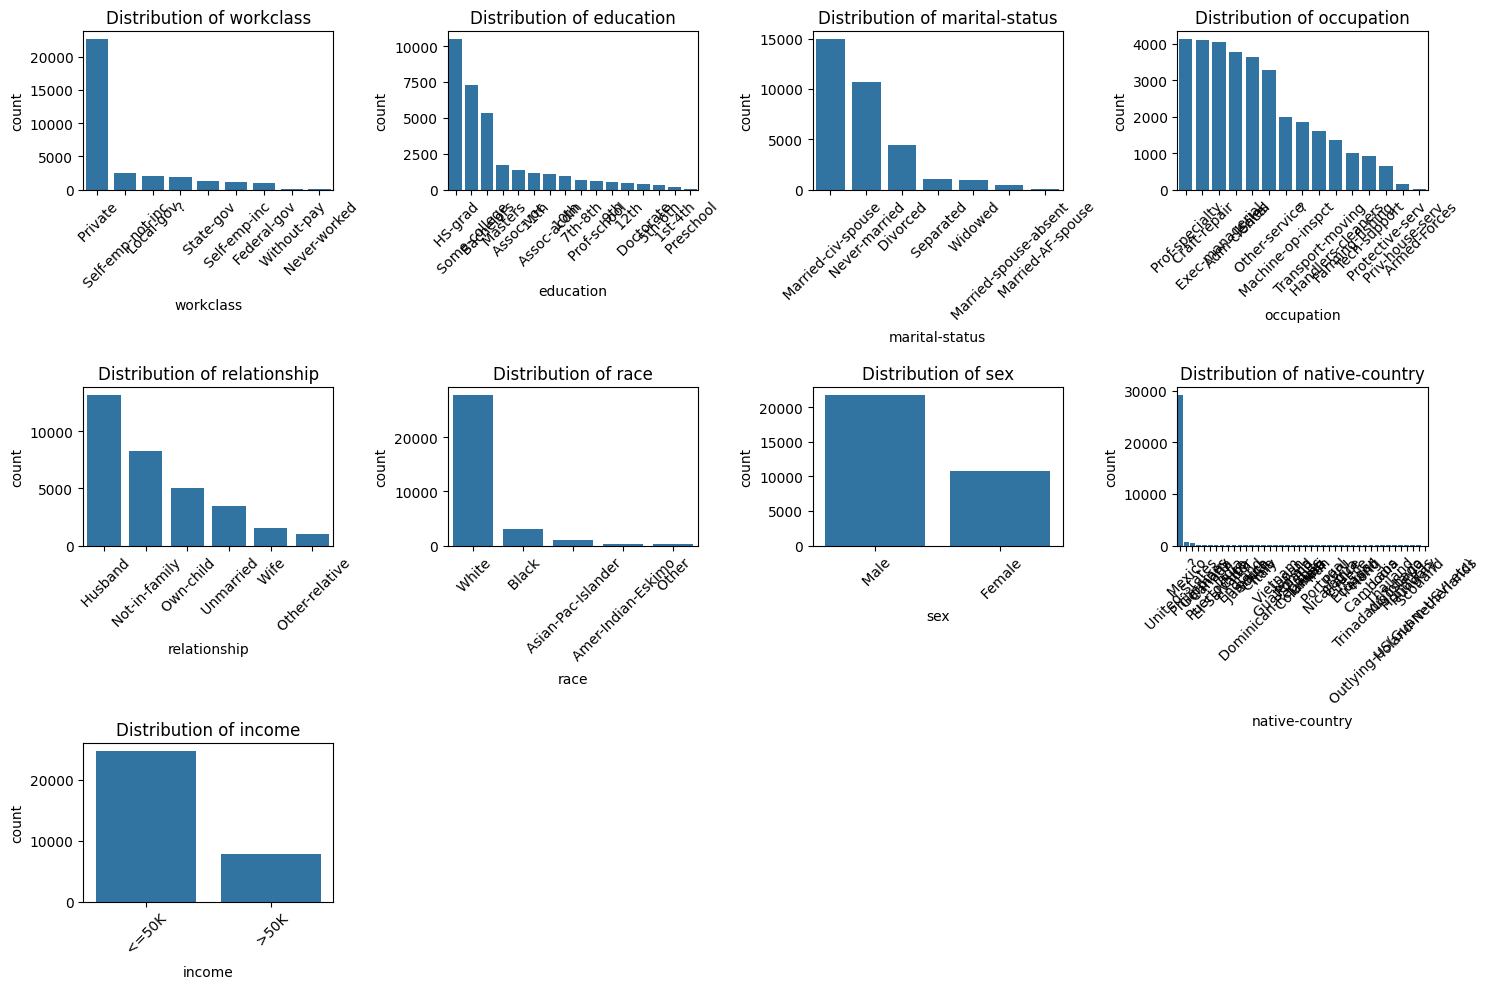

In [6]:

cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 4, i)  # Adjust subplot grid size as needed
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# ***Task NO 1: Data Preprocessing***

1.   Handling Missing Data:
2.   Encoding Categorical Data:
3. Normalization and Standardization:
4. Feature Engineering:





In [7]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7033,58,Private,306233,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,40,United-States,>50K
30759,33,Private,857532,12th,8,Never-married,Protective-serv,Own-child,Black,Male,0,0,40,United-States,<=50K
29433,51,Private,177705,Bachelors,13,Divorced,Sales,Not-in-family,White,Male,0,0,50,United-States,>50K
2501,60,Private,162947,5th-6th,3,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,Puerto-Rico,<=50K
21005,28,Private,339372,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K


**Handling Missing Data:**

In [8]:
#check for missing value
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


There is no null value in any of the column But let check for inconsistent data

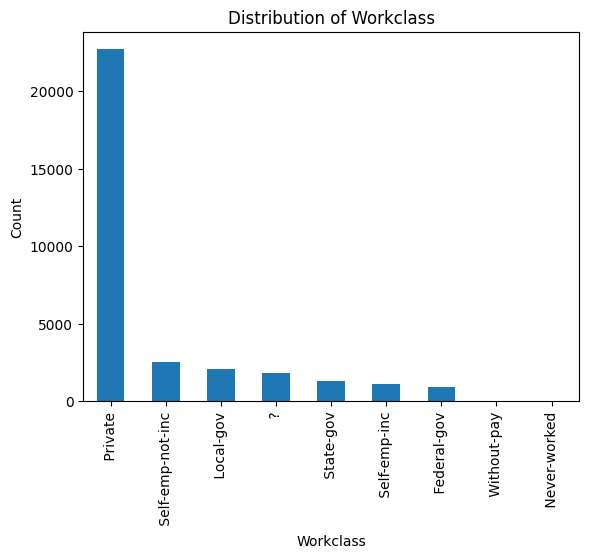

In [9]:
#the workclass column values and their count

workclass_counts = df['workclass'].value_counts()
workclass_counts.plot(kind='bar')
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

In [10]:
#Identify missing or inconsistent data

# Check for '?' in the dataset
for col in df.columns:
  print(f'{col}: {df[df[col] == " ?"].shape[0]}')


age: 0
workclass: 1836
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 583
income: 0


In [11]:
#Replace missing values in the workclass and occupation columns using the mode.

# Find the mode of the 'workclass' column
workclass_mode = df['workclass'].mode()[0]

# Replace '?' with the mode in the 'workclass' column
df['workclass'] = df['workclass'].replace(' ?', workclass_mode)

# Find the mode of the 'occupation' column
occupation_mode = df['occupation'].mode()[0]

#and in sales
# Replace '?' with the mode in the 'occupation' column
df['occupation'] = df['occupation'].replace(' ?', occupation_mode)


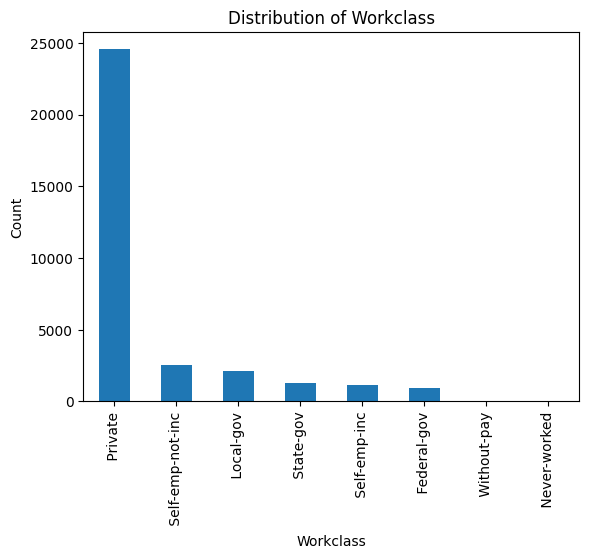

In [12]:
workclass_counts2 = df['workclass'].value_counts()
workclass_counts2.plot(kind='bar')
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

In [13]:
#this will remove the value ' ?' and store in df and now we can see the states
df = df[df['native-country'] != ' ?']
for col in df.columns:
  print(f'{col}: {df[df[col] == " ?"].shape[0]}')


age: 0
workclass: 0
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 0
income: 0


***Encoding Categorical Data:***

In [14]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','income']

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Iterate through columns and apply label encoding
for col in categorical_cols:
    df.loc[:, col] = encoder.fit_transform(df[col])

print(df.head())

   age workclass  fnlwgt education  education-num marital-status occupation  \
0   50         5   83311         9             13              2          3   
1   38         3  215646        11              9              0          5   
2   53         3  234721         1              7              2          5   
3   28         3  338409         9             13              2          9   
4   37         3  284582        12             14              2          3   

  relationship race sex  capital-gain  capital-loss  hours-per-week  \
0            0    4   1             0             0              13   
1            1    4   1             0             0              40   
2            0    2   1             0             0              40   
3            5    2   0             0             0              40   
4            5    4   0             0             0              40   

  native-country income  
0             38      0  
1             38      0  
2             38    

***Normalization and Standardization:***

In [15]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize the specified columns
df[['hours-per-week', 'capital-gain']] = scaler.fit_transform(df[['hours-per-week', 'capital-gain']])

print(df.head())

   age workclass  fnlwgt education  education-num marital-status occupation  \
0   50         5   83311         9             13              2          3   
1   38         3  215646        11              9              0          5   
2   53         3  234721         1              7              2          5   
3   28         3  338409         9             13              2          9   
4   37         3  284582        12             14              2          3   

  relationship race sex  capital-gain  capital-loss  hours-per-week  \
0            0    4   1           0.0             0        0.122449   
1            1    4   1           0.0             0        0.397959   
2            0    2   1           0.0             0        0.397959   
3            5    2   0           0.0             0        0.397959   
4            5    4   0           0.0             0        0.397959   

  native-country income  
0             38      0  
1             38      0  
2             38    

In [16]:
df['age'] = scaler.fit_transform(df['age'].values.reshape(-1, 1))

print(df.head())

        age workclass  fnlwgt education  education-num marital-status  \
0  0.452055         5   83311         9             13              2   
1  0.287671         3  215646        11              9              0   
2  0.493151         3  234721         1              7              2   
3  0.150685         3  338409         9             13              2   
4  0.273973         3  284582        12             14              2   

  occupation relationship race sex  capital-gain  capital-loss  \
0          3            0    4   1           0.0             0   
1          5            1    4   1           0.0             0   
2          5            0    2   1           0.0             0   
3          9            5    2   0           0.0             0   
4          3            5    4   0           0.0             0   

   hours-per-week native-country income  
0        0.122449             38      0  
1        0.397959             38      0  
2        0.397959             38      

***Feature Engineering:***

In [17]:
# Create a new column for the ratio
df['capital_gain_ratio'] = df['capital-gain'] / df['capital-loss']

# Fill NaN values with 0 (or handle them differently if needed)
df['capital_gain_ratio'].fillna(0, inplace=True)

print(df.head(10))

        age workclass  fnlwgt education  education-num marital-status  \
0  0.452055         5   83311         9             13              2   
1  0.287671         3  215646        11              9              0   
2  0.493151         3  234721         1              7              2   
3  0.150685         3  338409         9             13              2   
4  0.273973         3  284582        12             14              2   
5  0.438356         3  160187         6              5              3   
6  0.479452         5  209642        11              9              2   
7  0.191781         3   45781        12             14              4   
8  0.342466         3  159449         9             13              2   
9  0.273973         3  280464        15             10              2   

  occupation relationship race sex  capital-gain  capital-loss  \
0          3            0    4   1      0.000000             0   
1          5            1    4   1      0.000000             0  

In [18]:
# Binarize the "hours-per-week" column
df['hours-per-week'] = (df['hours-per-week'] > 0.40).astype(int)
print(df.head(10))

        age workclass  fnlwgt education  education-num marital-status  \
0  0.452055         5   83311         9             13              2   
1  0.287671         3  215646        11              9              0   
2  0.493151         3  234721         1              7              2   
3  0.150685         3  338409         9             13              2   
4  0.273973         3  284582        12             14              2   
5  0.438356         3  160187         6              5              3   
6  0.479452         5  209642        11              9              2   
7  0.191781         3   45781        12             14              4   
8  0.342466         3  159449         9             13              2   
9  0.273973         3  280464        15             10              2   

  occupation relationship race sex  capital-gain  capital-loss  \
0          3            0    4   1      0.000000             0   
1          5            1    4   1      0.000000             0  

# ***Task 2: Data Cleaning and Integration***


1.   Clean the dataset by:
2.   Data integration.



In [19]:
df.duplicated().sum()

52

In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

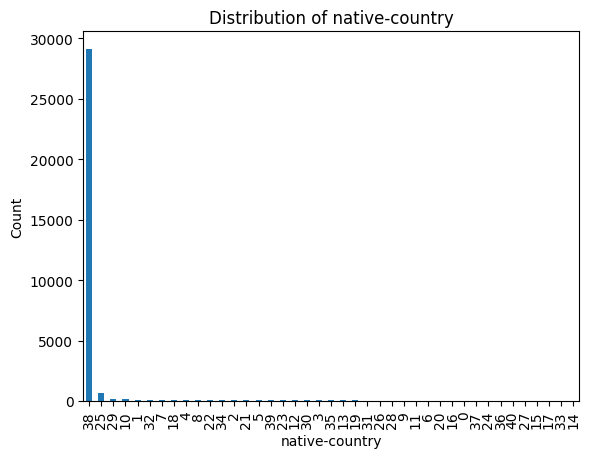

In [22]:
nc_counts = df['native-country'].value_counts()
nc_counts.plot(kind='bar')
plt.title('Distribution of native-country')
plt.xlabel('native-country')
plt.ylabel('Count')
plt.show()

# ***Task 3: Exploratory Data Analysis (EDA) Before and After Preprocessing***


*   Perform an initial EDA (summary statistics, missing values, distribution plots) before
any preprocessing.
*   Preprocess the dataset (cleaning, encoding, normalization).


*   Perform EDA again after preprocessing and compare the results.
*   Write a short report on how preprocessing improved the data.





In [23]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe(include=[float, int]))

# Display summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include=[object]))


Summary Statistics for Numerical Columns:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  31925.000000  3.192500e+04   31925.000000  31925.000000  31925.000000   
mean       0.295848  1.897311e+05      10.071668      0.010661     86.883352   
std        0.187077  1.057541e+05       2.559908      0.073046    401.911960   
min        0.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%        0.150685  1.176180e+05       9.000000      0.000000      0.000000   
50%        0.273973  1.782950e+05      10.000000      0.000000      0.000000   
75%        0.424658  2.374520e+05      12.000000      0.000000      0.000000   
max        1.000000  1.484705e+06      16.000000      1.000000   4356.000000   

       hours-per-week  capital_gain_ratio  
count    31925.000000             31925.0  
mean         0.294158                 inf  
std          0.455671                 NaN  
min          0.000000                 0.0  
25%          0.0

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


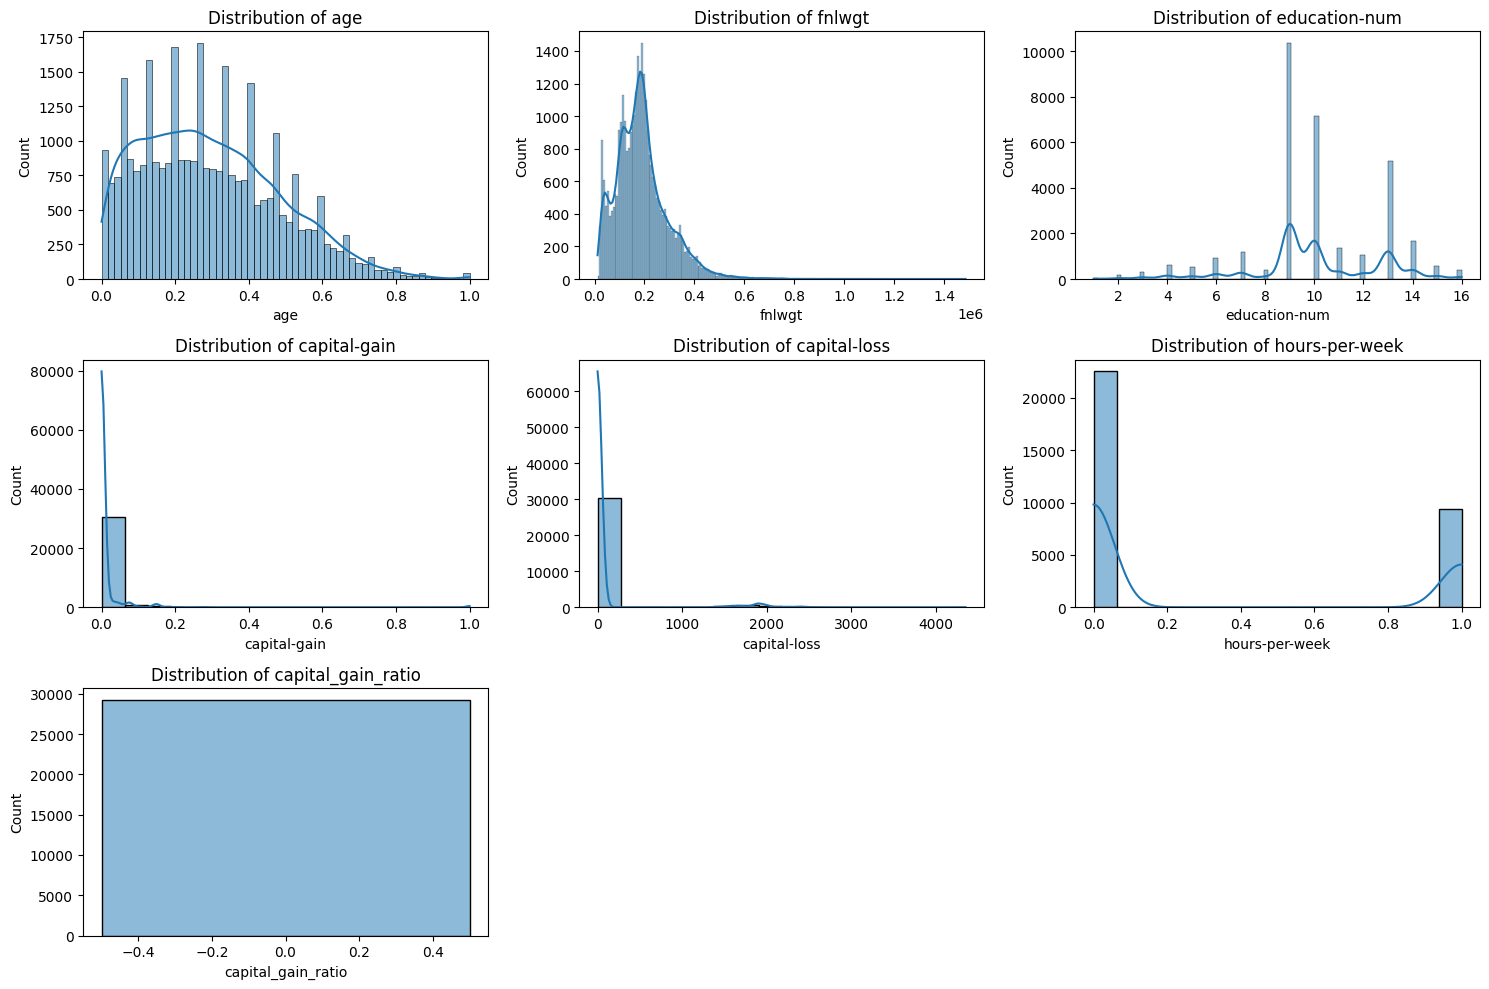

In [24]:
# Plot distribution of numerical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # Adjust subplot grid size as needed
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

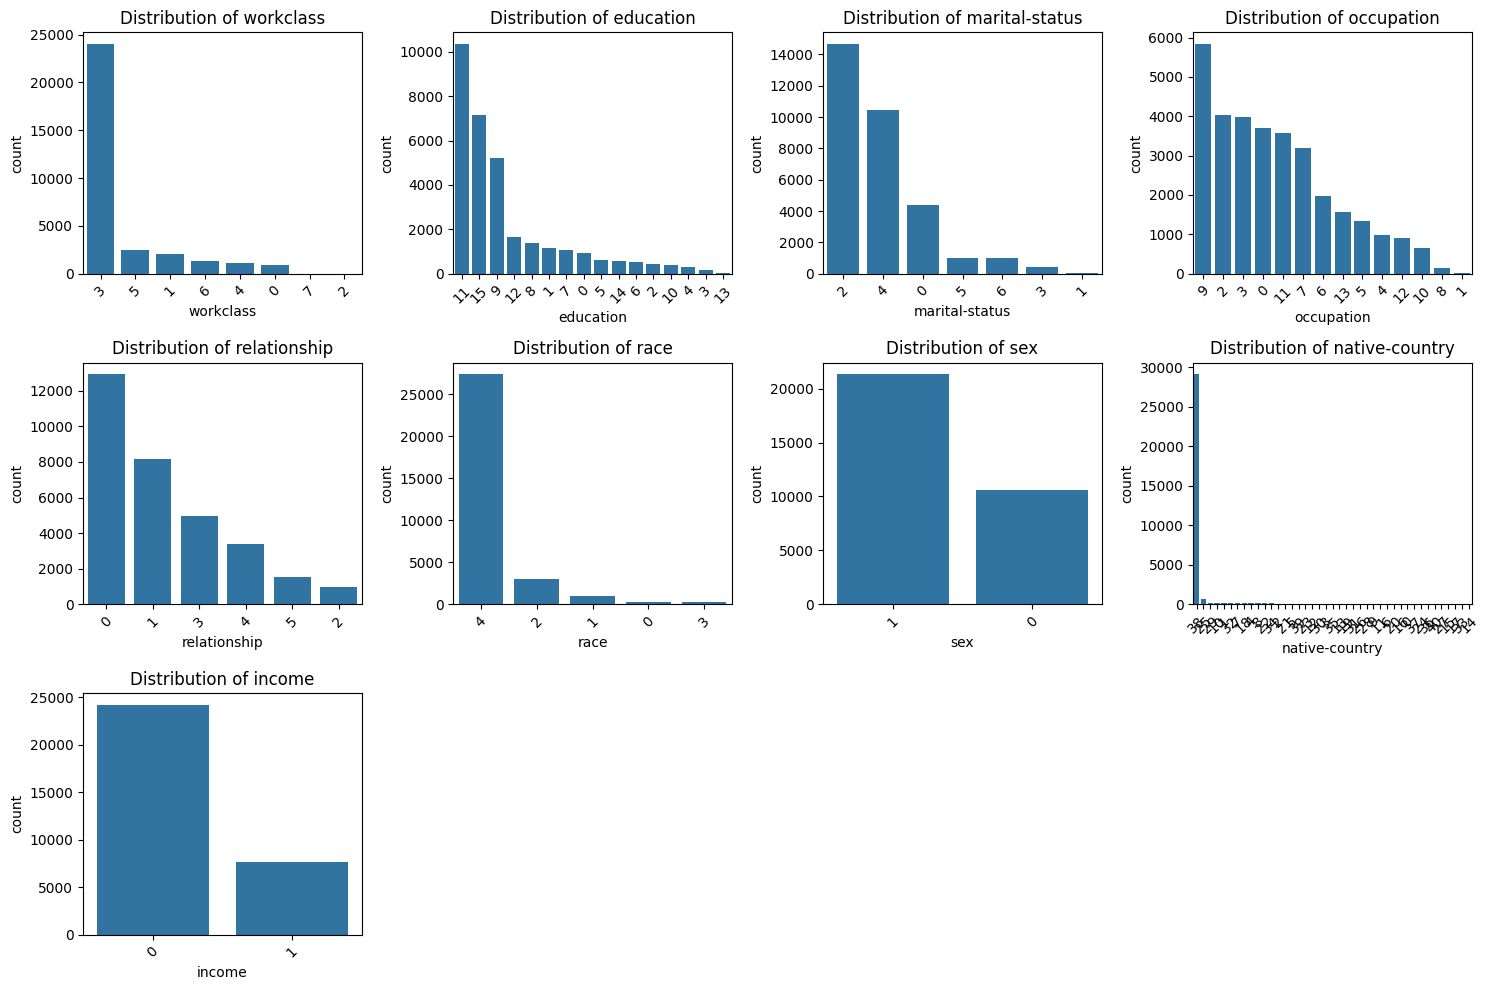

In [25]:
# Plot distribution of categorical features
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 4, i)  # Adjust subplot grid size as needed
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I address the missing value or inconsistent data in some of the columns like workclass, occupation and native country. The outlier is identify by visualization and removed or handle appropriately. This help us to remove the noise and make data clean. Categorical features like [workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','income'] were encoded using label encoding to convert them into a numerical format suitable for machine learning algorithms.